In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

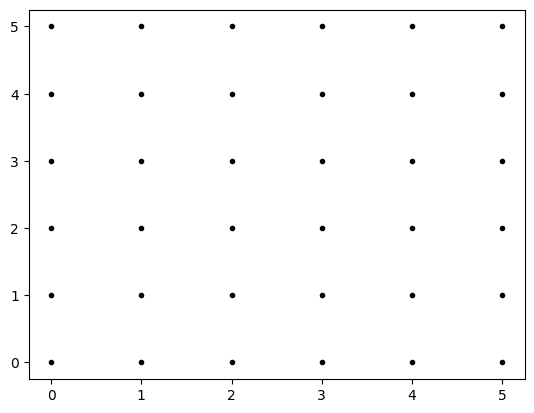

In [2]:
'''1. numpy의 range와 meshgird함수를 활용해서 아래 문제를 해결해주세요
  
0 <= x <= 5, x는 정수
0 <= y <= 5, y는 정수

위 조건을 만족하는 모든 x,y 좌표에 대해 plot에 점을 찍어주세요'''
import pandas as pd
from matplotlib import pyplot as plt

x_values = np.arange(0,6)
y_values = np.arange(0,6)

x, y = np.meshgrid(x_values, y_values)

plt.plot(x, y, marker='.', color ='black', linestyle = 'none')

plt.show()

In [88]:
"""
2-1 )pandas로, 아래와 같은 데이터를 만든 후에 to_csv를 활용해서 데이터를 csv형태로 저장합니다.
레퍼런스)https://pandas.pydata.org/pandas-docs/stable/index.html

 * header 형식 : 학번 점수
 * 학번은 1 ~ 100000까지 sequential하게 하고 점수는 0~100의 값을 랜덤으로 작성합니다.
 """
import pandas as pd
import numpy as np

data = {
    'student_id' : np.arange(1, 100001),
    'score' : np.random.uniform(0, 101, size=100000)
}

df = pd.DataFrame(data)

df.to_csv(r'export_dataframe.csv', index = False, header=True)


In [89]:
print(df)

       student_id      score
0               1  28.319698
1               2  64.729878
2               3  27.281994
3               4   2.922912
4               5   0.832424
...           ...        ...
99995       99996  70.205045
99996       99997   1.136958
99997       99998  13.694747
99998       99999  22.068500
99999      100000  56.938790

[100000 rows x 2 columns]


In [91]:
"""
2-2) read_csv를 통해 해당 데이터를 읽어옵니다.
2-3) 점수를 기준으로 내림차순 정렬 합니다
"""
import pandas as pd

df = pd.read_csv('/Users/Ryu Seung Gwon/Library/CloudStorage/OneDrive-한양대학교/대외활동/코멘토/2주차/2주차 과제 제출 (류승권)/export_dataframe.csv')

df_sorted = df.sort_values(by='score', ascending=False)

print(df_sorted)

       student_id       score
59077       59078  100.999959
17229       17230  100.999700
65380       65381  100.995220
22669       22670  100.995179
99702       99703  100.994969
...           ...         ...
9077         9078    0.008579
98614       98615    0.008126
30494       30495    0.007648
51792       51793    0.006665
57421       57422    0.005316

[100000 rows x 2 columns]


In [92]:
"""
2-4) 아래 값들을 구합니다.
 * 전체 학생의 평균,분산,표준편자,최대값,최소값
"""
import pandas as pd

mean_score = df['score'].mean()
var_score = df['score'].var()
std_score = df['score'].std()
max_score = df['score'].max()
min_score = df['score'].min()

print("mean:", mean_score)
print("var:" , var_score)
print("std:", std_score)
print("max:", max_score)
print("min:", min_score)

mean: 50.49820956202956
var: 850.2963948390656
std: 29.159842160736495
max: 100.99995871304304
min: 0.0053161804495631


[0, 28.309080391829685, 76.78736264749365, 87.8572675613586, 95.83659804810186, 100]


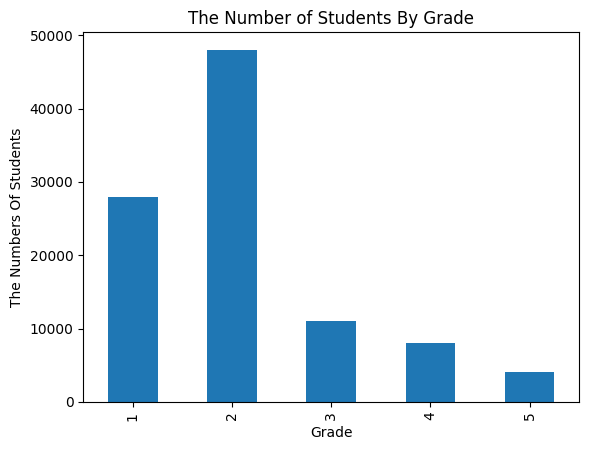

In [93]:
"""
2-5) grade라는 column을 하나 생성해서 1~5로 등급을 표시합니다.
 * 1등급 : 상위 5%
 * 2등급 : 상위 6~13%
 * 3등급 : 상위 14~24%
 * 4등급 : 상위 25~72%
 * 5등급 : 상위 73~100%
2-6) 각 등급별 인원을 grpupy합니다.
2-7) 2-6)에서 저장한 값을 plot으로 출력합니다.
"""
import pandas as pd
import matplotlib.pyplot as plt

quantiles = [df['score'].quantile(0.95), df['score'].quantile(0.87),
             df['score'].quantile(0.76), df['score'].quantile(0.28)]

bins = sorted([0] + quantiles + [100])
print(bins)

df['grade'] = pd.cut(df['score'], bins=bins,
                     labels=[1, 2, 3, 4, 5])

grouped = df.groupby('grade').size()
grouped.plot(kind='bar')

plt.title('The Number of Students By Grade')
plt.xlabel('Grade')
plt.ylabel('The Numbers Of Students')
plt.show()
